<a href="https://colab.research.google.com/github/mdacoca/da_portfolio/blob/de_camp/mobile_plan_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Привет еще раз. Спасибо, что доделала работу. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация. 

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Привет, Мария! Спасибо, что прислала задание:) Меня зовут Слепцов Артем и я буду проверять твой проект) Ты проделала большую работу над проектом, однако его еще можно улучшить. Будет здорово, если ты, надеюсь, не против, если я буду на ты, будешь отвечать на комментарии и участвовать в диалоге. 

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно. Рекомендации укажу таким же цветом; <font color=orange>оранжевый</font> - некритичные замечания. Если таких замечаний меньше трех - проект может быть принят без их отработки; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 
    
У нас сейчас новогодние каникулы - но у меня было свободное время, и я решил проверить твою работу. Не могу обещать повторную проверку в течение 24 часов до конца каникул. Но 11 января все ревьюеры начнут работать в штатном режиме, и я обязательно увижу твой проект снова"

</div>

# Определение перспективного тарифа для телеком компании

1. <font size="3">[Описание проекта](#overview)</font>
2. <font size="3">[Подготовка данных](#data-prep)</font>:
    1. <font size="3">[Users (информация о клиентах)](#users-info)
    2. <font size="3">[Calls (информация о звонках)](#calls-info)
    3. <font size="3">[Messages (информация о sms сообщениях)](#messages-info)
    4. <font size="3">[Internet (информация об использовании интернета)](#nternet-info)
    5. <font size="3">[Tariffs (информация о тарифах)](#ariffs-info)
3. <font size="3">[Рассчеты использования тарифов клиентами (по месяцам)](#clients-calculations)
    1. <font size="3">[Calls (информация о звонках)](#calls-info-02)
    2. <font size="3">[Messages (информация о sms сообщениях)](#messages-info-02)
    3. <font size="3">[Internet (информация об использовании интернета)](#nternet-info-02)
    4. <font size="3">[Сводная таблица с рассчетами](#clients-meged)
4. <font size="3">[Исследовательский анализ тарифов](#smart-ultra-calculations)
    1. <font size="3">[Calls (информация о звонках)](#calls-info-03)
    2. <font size="3">[Internet (информация об использовании интернета)](#nternet-info-03)
    3. <font size="3">[Messages (информация о sms сообщениях)](#messages-info-03)
5. <font size="3">[Проверка гипотез: средняя выручка](#hyp-test-01)
6. <font size="3">[Проверка гипотез: выручка по городам](#hyp-test-02)
7. <font size="3">[Общий вывод](#conclustion)

# <a name="overview">Описание проекта</a>

Компания «Мегалайн» — федеральный оператор сотовой связи предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов

**Тариф «Смарт»**
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей

> «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

## Описание данных

Таблица users (информация о пользователях):
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tariff` — название тарифного плана


Таблица calls (информация о звонках):

* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок


Таблица messages (информация о сообщениях):

* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение


Таблица internet (информация об интернет-сессиях):

* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя


Таблица tariffs (информация о тарифах):

* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Задачи

1. Опишите поведение клиентов оператора, исходя из выборки:
    * Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
    * Посчитайте среднее количество, дисперсию и стандартное отклонение. 
    * Постройте гистограммы. Опишите распределения.
2.  Проверьте гипотезы:
    * средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
    * средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
3. Поясните:
    * как вы формулировали нулевую и альтернативную гипотезы;
    * какой критерий использовали для проверки гипотез и почему.
4. Общий вывод

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Здорово, что каждому пункту вводной информации ты уделила внимание. 

</div>

# <a name="data-prep">Подготовка данных</a>

In [ ]:
# импорт необходимых библиотек 
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats as st
pd.options.mode.chained_assignment = None  # default='warn'
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  
from pymystem3 import Mystem
from matplotlib import pyplot as plt
m = Mystem()

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Правильно, что весь импорт ты проводишь в первой ячейке работы. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет при необходимости быстро настроить окружение. 

</div>

In [ ]:
# импорт данных
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')


Так как данные у меня в нескольких таблицах, мне надо будет свести их в одну по столбцу `user_id`, по которому можно объеденить таблицы: `users`, `calls`, `internet`, `messages`.

Прежде, чем объединять таблицы, необходимо проверить наличие пропусков, дублей и поправить (если необходимо) типы данных во всех таблицах.

## <a name="users-info">Users (информация о клиентах)</a>

Таблица `users` содержит информация о клиентах - id, дату регистрации, ФИО и так далее:

In [ ]:
# проверяем тип данных и количество пропусков
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
# проверяем визуально
users.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
490,1490,30,NaN,Москва,Радомир,Алесин,2018-04-03,smart
365,1365,38,NaN,Ростов-на-Дону,Георгий,Вишняков,2018-10-31,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
160,1160,73,NaN,Ульяновск,Борис,Авдонюшкин,2018-07-03,smart
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
238,1238,57,NaN,Ростов-на-Дону,Радислав,Наумов,2018-01-08,smart
344,1344,60,NaN,Воронеж,Илзе,Игнатьева,2018-04-03,ultra
421,1421,30,NaN,Калининград,Гайдар,Александрович,2018-02-22,smart
289,1289,20,NaN,Москва,Таисия,Богданова,2018-09-01,ultra
415,1415,41,NaN,Москва,Андрей,Лукин,2018-06-29,ultra


По данным видно, что часть клиентов прекратили пользоваться услугами оператора связи на момент выгрузки данных. Так как какое-то время такие клиенты тарифом все же пользовались, данные которые есть по таким клиентам мне нужны, не важно пользуются они оператором сейчас или нет. Пропуски в столбце  `churn_date` не мешают анализу, так как я не использую этот столбец, поэтому я оставляю столбец без изменений.

In [ ]:
#проверяю наличие дублей
users.duplicated().sum()

0

Из информации о таблице вижу, что `reg_date` имеет тип даннхы `object`, который необходимо заменить на `datetime`:

In [ ]:
# меняю тип данных с  object на datetime:
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")

Так как есть столбец с названием городов, проверим на ошибки, опечатки и т.д. этот столбец:

In [ ]:
# смотрим уникальные значения чтобы проверить данные визуально
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Все названия выглядят уникальными, ошибок и опечаток нет, все ок.

## <a name="calls-info">Calls (информация о звонках)</a>

Таблица `calls` содержит информация о звонках - id, длительность, дату и так далее:

In [ ]:
# проверяем информацию о таблице
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Индекс и количество строк в каждом столбце совпадают - пропусков нет.

In [ ]:
# проверяем визуально
calls.sample(10)

,id,call_date,duration,user_id
3365,1007_568,2018-08-20,0.00,1007
84157,1210_32,2018-12-17,12.35,1210
188657,1465_374,2018-07-28,6.74,1465
194089,1476_386,2018-06-29,8.27,1476
188063,1464_583,2018-07-02,0.71,1464
190032,1468_3,2018-03-19,17.63,1468
57838,1146_57,2018-12-19,2.36,1146
124909,1321_359,2018-09-01,10.89,1321
53486,1134_547,2018-10-08,7.89,1134
159109,1393_361,2018-11-24,0.00,1393


In [ ]:
#проверяю наличие дублей
calls.duplicated().sum()

0

Из информации о таблице вижу, что `call_date` имеет тип даннхы `object`, который необходимо заменить на `datetime`:

In [ ]:
# меняю тип данных с  object на datetime:
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")

В таблице много звонков с длительностью 0.00. В условии у нас указано, что оператор всегда округляет значения минут вверх, а не вниз. Это значит, что звонки с длительностью 0.00 не могут быть звонками, которые длились менее минуты. Скорее всего - это звонки, которые сорвались или звонки, которые клиент не принял (не взял трубку). Чтобы решить, что с ними делать, смотрю на количество таких звонков и как это будет выглядеть на гистограмме (так нагляднее).

In [ ]:
#общее количество звонков
calls.query('duration == 0.0').count()

id           39613
call_date    39613
duration     39613
user_id      39613
dtype: int64

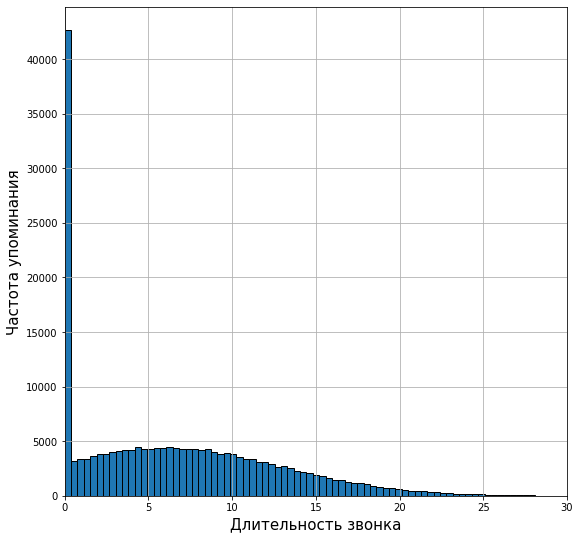

In [ ]:
# смотрю как это выглядит на гистограмме
calls['duration'].plot(kind='hist', ec='black',  bins=100, figsize=(9, 9), grid=True)
plt.xlabel('Длительность звонка', fontsize=15)
plt.ylabel('Частота упоминания', fontsize=15)
plt.xlim([0, 30])
plt.show()


Нолевых значений слишком много, при дальнейшем анализе они будут влиять на среднее значение и результаты. К тому же, за звонки длительностью 0.00 минут оператор не получит никакой выручки, поэтому такие значения я удаляю из таблицы.

In [ ]:
# удаляю нулевые значения из таблицы
calls['duration'] = calls['duration'].replace(0, np.NaN)
calls = calls.dropna()


<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Исходя из какого предположения звонки с нулевой длительностью удалены? Стоит подробно описывать ход своих мыслей. Какова возможная причина их появления - недозвоны или что-то другое?

</div>

<div class="alert alert-info" role="alert">  
добавила еще что звонки с длительностью 0 - это звонки не случившиеся
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Да, вполне возможное предположение. 

</div>

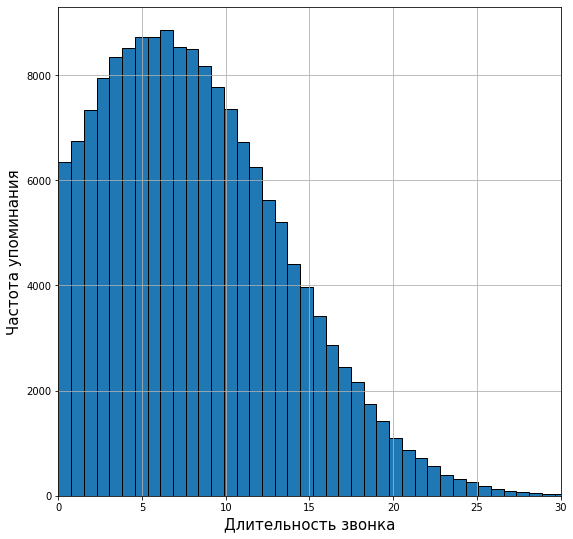

In [ ]:
# смотрю как это выглядит на гистограмме
calls['duration'].plot(kind='hist', ec='black', bins=50, figsize=(9, 9), grid=True)
plt.xlabel('Длительность звонка', fontsize=15)
plt.ylabel('Частота упоминания', fontsize=15)
plt.xlim([0, 30])
plt.show()

Выбивающихся из общего распределения нулей нет, но много около нулевых значений. Чтобы понять, что происходит проверяю минимальное значение в столбце.

In [ ]:
calls['duration'].min()

0.01

Так, как мы знаем, что оператор округлит значния типа 0.01 до минуты, округляем все значения в столбце вверх до целеого числа и меняем тип данных, чтобы не было плавающей точки:

In [ ]:
# округляем и меняем тип данных
calls['duration'] = calls['duration'].apply(np.ceil).astype(int)

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Верно, что округление производится до суммирования. Это согласуется с тем, как оператор фиксирует выручку.

</div>

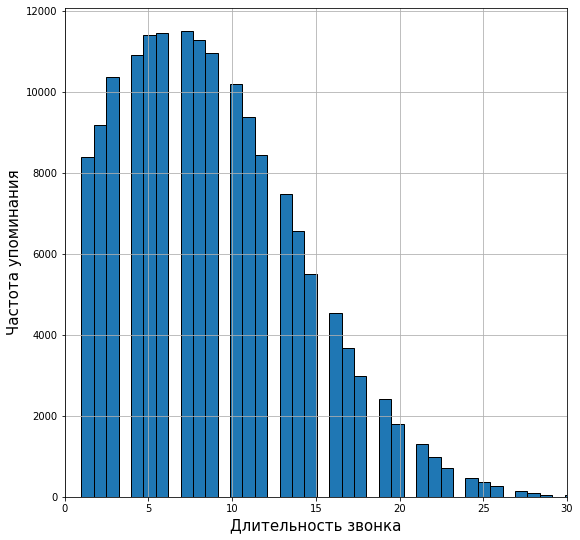

In [ ]:
# смотрю как это выглядит на гистограмме
calls['duration'].plot(kind='hist', ec='black', bins=50, figsize=(9, 9), grid=True)
plt.xlabel('Длительность звонка', fontsize=15)
plt.ylabel('Частота упоминания', fontsize=15)
plt.xlim([0, 30])
plt.show()

Гистограмма показывает, что нет звонков с длительностью 0 или около 0. 

## <a name="messages-info">Messages (информация о sms сообщениях)</a>

Таблица `messages` содержит информация о звонках - id, количество, дату и т.д:

In [ ]:
# проверяем информацию о таблице
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Индекс и количество строк в каждом столбце совпадает - пропусков нет.

In [ ]:
# проверяем визуально
messages.sample(10)

,id,message_date,user_id
66517,1284_105,2018-11-21,1284
30952,1134_670,2018-05-12,1134
14631,1064_318,2018-10-21,1064
42895,1186_308,2018-12-19,1186
121654,1492_21,2018-12-12,1492
8112,1032_283,2018-12-24,1032
73088,1309_224,2018-10-05,1309
20400,1089_403,2018-10-23,1089
112052,1453_77,2018-05-23,1453
35974,1155_363,2018-02-10,1155


In [ ]:
#проверяю наличие дублей
messages.duplicated().sum()

0

Из информации о таблице вижу, что `message_date` имеет тип даннхы `object`, который необходимо заменить на `datetime`:

In [ ]:
# меняю тип данных с  object на datetime:
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")

## <a name="internet-info">Internet (информация об использовании интернета)</a>

Таблица `internet` содержит информация о объемах интернет траффика, которые использовали клиенты - id, дату сессии, количество трафика в мб и т.д:

In [ ]:
# проверяем информацию о таблице
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Индекс и количество строк в каждом столбце совпадают - пропусков нет.

In [ ]:
# проверяем визуально
internet.sample(10)

,Unnamed: 0,id,mb_used,session_date,user_id
30424,30424,1106_226,381.03,2018-06-03,1106
144993,144993,1483_372,343.26,2018-08-05,1483
52294,52294,1176_449,179.42,2018-11-29,1176
57306,57306,1191_102,800.14,2018-08-05,1191
43263,43263,1149_263,333.93,2018-12-28,1149
98354,98354,1330_562,728.25,2018-08-01,1330
104936,104936,1355_148,267.76,2018-10-22,1355
144876,144876,1483_255,681.25,2018-09-18,1483
45309,45309,1155_496,183.07,2018-01-03,1155
138185,138185,1464_409,325.30,2018-07-15,1464


In [ ]:
#проверяю наличие дублей
internet.duplicated().sum()

0

Из информации о таблице вижу, что `session_date` имеет тип даннхы `object`, который необходимо заменить на `datetime`:

In [ ]:
# меняю тип данных с  object на datetime:
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")

Проверяю таблицу на количество интернет сессий с 0.00 мб скачанных данных. 

Отсутсвие траффика при подключении значит, что сессия по каким-то причинам оборвалась сразу же после подключения или клиент не смог подключиться. Сессии с количеством 0.00 мб не могут быть сессиями, в которых было скачано менее 1 мб данных (помним про округление вверх). Чтобы решить, что с ними делать, смотрю на количество таких сессий и как это будет выглядеть на гистограмме (так нагляднее).

In [ ]:
#общее количество сессий 
internet.query('mb_used == 0.0').count()

Unnamed: 0      19598
id              19598
mb_used         19598
session_date    19598
user_id         19598
dtype: int64

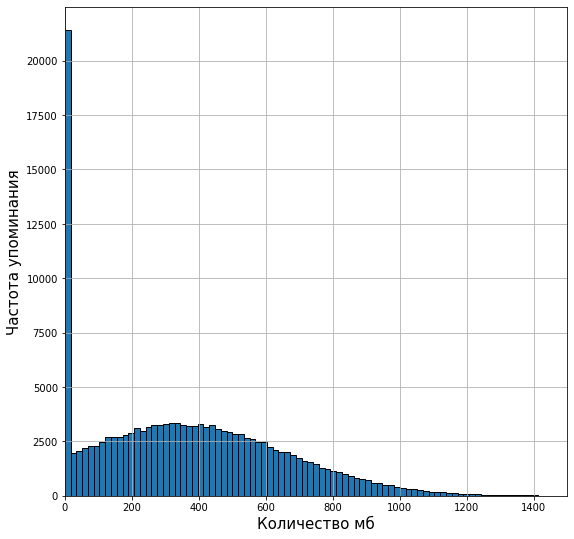

In [ ]:
# смотрю как это выглядит на гистограмме
internet['mb_used'].plot(kind='hist', ec='black', bins=100, figsize=(9, 9), grid=True)
plt.xlabel('Количество мб', fontsize=15)
plt.ylabel('Частота упоминания', fontsize=15)
plt.xlim([0, 1500])
plt.show()

Нулевых значений слишком много, при дальнейшем анализе они будут влиять на среднее значение и результаты. К тому же, за сессии с 0.00 мб трафика оператор не получит никакой выручки, поэтому такие значения я удаляю из таблицы, а остальное округляю вверх.

In [ ]:
# округляем и меняем тип данных
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype(int)

In [ ]:
# удаляю нулевые значения из таблицы
internet['mb_used'] = internet['mb_used'].replace(0, np.NaN)
internet = internet.dropna()

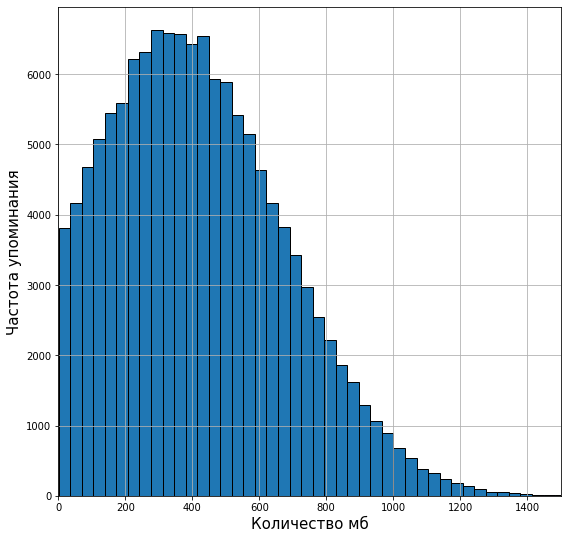

In [ ]:
# смотрю как это выглядит на гистограмме
internet['mb_used'].plot(kind='hist', ec='black', bins=50, figsize=(9, 9), grid=True)
plt.xlabel('Количество мб', fontsize=15)
plt.ylabel('Частота упоминания', fontsize=15)
plt.xlim([0, 1500])
plt.show()

Выбивающихся из общего распределения нулей нет, но много около нулевых значений. Чтобы понять, что происходит проверяю минимальное значение в столбце:

In [ ]:
# проверяю не равно ли минимальное значение 0
internet['mb_used'].min()

1.0

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

Опять же подумай о причинах появления таких значений в данных. Не забудь округлить значения по использованию трафика. Оператор их округляет, как и звонки, в большую сторону.

</div>

<div class="alert alert-info" role="alert">
Ой.. округлила! :))
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Ага, теперь все правильно)  

</div>

## <a name="tariffs-info">Tariffs (информация о тарифах)</a>

Информация о двух тарифах:

In [ ]:
# проверяем информацию о датасете
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [ ]:
# проверяем визуально
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
# меняю название столбца, чтобы проще было объединять таблицы
tariffs.columns =['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff']

**Вывод:** Данные подготовленны к обработке, удалены пропуски и выбросы, исправленны типы данных, устранены прочие недочеты которые могли бы исказить результаты анализа.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Первый взгляд на данные произведен. Ошибки в таблицах исправлены. Данные подготовлены к дальнейшему анализу. 

</div>

# <a name="clients-calculations">Рассчеты использования тарифов клиентами (по месяцам)</a>

## <a name="calls-info-02">Calls (информация о звонках)</a>

Сколько минут разговора требуется клиентам каждого тарифа в месяц. 


In [ ]:
# Добавляю стобец с месяцем
calls['month'] = pd.DatetimeIndex(calls['call_date']).month


In [ ]:
# создаю новую таблицу количеством и длительностью звонков для каждого клиента по месяцам
calls_month = pd.pivot_table(calls, index=['user_id','month'],
                                    values=['duration','id'],
                                    aggfunc={'duration':sum,'id':'count'}
                             ).reset_index()
# меняем название столбцов
calls_month.columns =['user_id', 'month', 'duration', 'calls_amount']

#проверяем результат
calls_month.sample(10)

,user_id,month,duration,calls_amount
125,1017,11,463,49
2460,1391,8,965,104
2038,1326,7,277,25
2781,1436,5,370,40
432,1067,8,386,47
2215,1356,9,866,93
890,1144,10,416,52
295,1048,8,271,29
1989,1318,10,538,73
1624,1262,8,381,42


## <a name="messages-info-02">Messages (информация о sms сообщениях)</a>

Количество отправленных сообщений по месяцам.

In [ ]:
# Добавляю стобец с месяцем 
messages['month'] = pd.DatetimeIndex(messages['message_date']).month


In [ ]:
# создаю новую таблицу количеством сообщений для каждого клиента по месяцам
messages_month = pd.pivot_table(messages, index=['user_id','month'],
                                          values='id',
                                          aggfunc='count'
                                ).reset_index()

# меняем название столбцов
messages_month.columns =['user_id', 'month', 'messages_amount']

#проверяем результат
messages_month.sample(10)

,user_id,month,messages_amount
2578,1475,12,27
2165,1403,10,54
918,1173,10,14
1205,1233,5,13
1175,1226,12,87
109,1018,12,37
2173,1404,9,48
1632,1315,7,34
768,1145,12,105
492,1091,6,30


## <a name="internet-info-02">Internet (информация об использовании интернета)</a>

Количество трафика по месяцам.

In [ ]:
# Добавляю стобец с месяцем
internet['month'] = pd.DatetimeIndex(internet['session_date']).month


In [ ]:
# создаю новую таблицу количеством сообщений для каждого клиента по месяцам
internet_month = pd.pivot_table(internet, index=['user_id','month'],
                                          values='mb_used',
                                          aggfunc='sum'
                                ).reset_index()


#проверяем результат
internet_month.sample(10)

,user_id,month,mb_used
2494,1392,8,15786.0
429,1067,5,15318.0
219,1034,9,17316.0
1604,1253,9,15361.0
3144,1490,7,10811.0
1300,1203,9,10552.0
2052,1325,9,23087.0
2993,1468,6,17002.0
2646,1414,10,21616.0
1452,1227,8,22632.0


<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Показатели рассчитаны. Данные подготовлены к дальнейшим расчетам.

</div>

## <a name="clients-meged">Сводная таблица с рассчетами</a>

Объединяю все таблицы в одну, для того чтобы проще было подсчитать доход от клиента в месяц.

In [ ]:
# объединяю данные из таблиц звонков и интернета
clients_total = calls_month.merge(internet_month, on=['user_id','month'], how ='outer')

# добавляю данные из таблицы с сообщениями
clients_total = clients_total.merge(messages_month, on=['user_id','month'], how ='outer')


# добавляю информацию о клиентах
clients_total = clients_total.merge(users[['user_id','tariff', 'city']], on='user_id', how ='left')

#добавляю информацию о тарифах
clients_total = clients_total.merge(tariffs, on='tariff', how='left')

# проверяю результат
clients_total.sample(10)

,user_id,month,duration,calls_amount,mb_used,messages_amount,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
1320,1209,6,291.0,32.0,16634.0,73.0,smart,Омск,50,15360,500,550,200,3,3
1684,1271,8,389.0,44.0,23471.0,117.0,ultra,Челябинск,1000,30720,3000,1950,150,1,1
2953,1465,12,592.0,70.0,16636.0,55.0,smart,Омск,50,15360,500,550,200,3,3
1431,1227,3,731.0,76.0,22410.0,32.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3
1857,1297,12,404.0,38.0,19006.0,NaN,smart,Иркутск,50,15360,500,550,200,3,3
74,1010,9,142.0,18.0,16173.0,NaN,smart,Тюмень,50,15360,500,550,200,3,3
2731,1429,12,241.0,26.0,21553.0,NaN,smart,Санкт-Петербург,50,15360,500,550,200,3,3
2351,1376,12,583.0,58.0,14563.0,NaN,smart,Самара,50,15360,500,550,200,3,3
736,1118,9,766.0,85.0,15253.0,NaN,smart,Казань,50,15360,500,550,200,3,3
1781,1285,6,387.0,43.0,6978.0,117.0,smart,Краснодар,50,15360,500,550,200,3,3


<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Да, именно внешнее соединение нам и нужно в данном случае. Иначе в таблицу не попадут клиенты, которые не пользовались одним из видов услуг оператора в течение конкретного месяца. 

</div>

Вижу, что есть пропуски, проверяю сколько их.

In [ ]:
# информация о таблице
clients_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 15 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
duration                 3168 non-null float64
calls_amount             3168 non-null float64
mb_used                  3201 non-null float64
messages_amount          2717 non-null float64
tariff                   3214 non-null object
city                     3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-null int64
dtypes: float64(4), int64(9), object(2)
memory usage: 401.8+ KB


Пропуски есть, видимо какие-то клиенты использовали тариф только для того, чтобы звонить, поэтому у них нет использованного трафика и так далее. Посмотрим количество пропусков в каждом столбце.

In [ ]:
pd.DataFrame(round((clients_total.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
user_id,0
month,0
duration,1.43
calls_amount,1.43
mb_used,0.4
messages_amount,15.46
tariff,0
city,0
messages_included,0
mb_per_month_included,0


15% - много, поэтому в 'messages_amount' я заменяю пропуски на 0, а остальные удаляю.

In [ ]:
# заменяю пропуски на 0
clients_total['messages_amount'].fillna(0, inplace=True)

# удаляю там, где можно удалить
clients_total.dropna(subset=['duration', 'calls_amount', 'mb_used'], inplace=True)

# проверяю результат
clients_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3155 entries, 0 to 3167
Data columns (total 15 columns):
user_id                  3155 non-null int64
month                    3155 non-null int64
duration                 3155 non-null float64
calls_amount             3155 non-null float64
mb_used                  3155 non-null float64
messages_amount          3155 non-null float64
tariff                   3155 non-null object
city                     3155 non-null object
messages_included        3155 non-null int64
mb_per_month_included    3155 non-null int64
minutes_included         3155 non-null int64
rub_monthly_fee          3155 non-null int64
rub_per_gb               3155 non-null int64
rub_per_message          3155 non-null int64
rub_per_minute           3155 non-null int64
dtypes: float64(4), int64(9), object(2)
memory usage: 394.4+ KB


<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Исходя из высказанной тобой причины появления пропусков, можно их все обработать 0. Однако удалено не так много данных, так что твой вариант вполне приемлем. 

</div>

In [ ]:
#проверяю наличие дублей
clients_total.duplicated().sum()

0

Таблица готова к дальнейшему анализу и вычислениям. 

Рассчитаем помесячную выручку с каждого клиента и добавим результат в отдельный столбец. 

In [ ]:
# функция для подсчета затрат сверх тарифа

def extra_expenses(row):
    ex_minutes = (row['calls_amount'] - row['minutes_included']) * row['rub_per_minute']
    ex_gb = (row['mb_used'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024
    ex_messages = (row['messages_amount'] - row['messages_included']) * row['rub_per_message']
    extra = 0
    for y in [ex_minutes, ex_gb, ex_messages]:
              if y > 0:
                extra +=y
    return extra
    

In [ ]:
# добавляем результат в отдельный столбец
clients_total['extra_expenses'] = clients_total.apply(lambda x: extra_expenses(x), axis=1)

In [ ]:
# считаем общую выручку и проверяем результат
clients_total['income'] = clients_total['extra_expenses'] + clients_total['rub_monthly_fee']
clients_total['income'] = clients_total['income'].astype(int)
clients_total.sample(10)


,user_id,month,duration,calls_amount,mb_used,messages_amount,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_expenses,income
458,1072,3,338.0,41.0,20541.0,24.0,smart,Уфа,50,15360,500,550,200,3,3,1011.914062,1561
2689,1424,11,16.0,4.0,17161.0,83.0,ultra,Москва,1000,30720,3000,1950,150,1,1,0.000000,1950
39,1005,10,723.0,78.0,7809.0,44.0,smart,Набережные Челны,50,15360,500,550,200,3,3,0.000000,550
290,1046,11,545.0,61.0,20996.0,33.0,smart,Тула,50,15360,500,550,200,3,3,1100.781250,1650
1100,1175,10,369.0,39.0,16894.0,0.0,smart,Москва,50,15360,500,550,200,3,3,299.609375,849
3100,1486,12,1007.0,115.0,38610.0,83.0,smart,Нижний Новгород,50,15360,500,550,200,3,3,4640.015625,5190
1754,1282,4,725.0,85.0,10618.0,79.0,smart,Ульяновск,50,15360,500,550,200,3,3,87.000000,637
1707,1274,11,479.0,55.0,18262.0,78.0,smart,Волгоград,50,15360,500,550,200,3,3,650.796875,1200
786,1125,10,219.0,31.0,10863.0,7.0,smart,Волгоград,50,15360,500,550,200,3,3,0.000000,550
2837,1449,8,547.0,65.0,15961.0,91.0,smart,Москва,50,15360,500,550,200,3,3,240.382812,790


<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Финальная таблица получена верным образом. Стоит убрать из нее излишнюю информацию о тарифах. Она у нас уже есть в таблице tariffs. Дублировать ее не стоит.

</div>

# <a name="smart-ultra-calculations"> Исследовательский анализ тарифов</a>

Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

Для удобства создам отдельные таблицы по тарифам.

In [ ]:
# создаю две отдельные таблицы по тарифам
smart = clients_total[clients_total['tariff'] == 'smart']
ultra = clients_total[clients_total['tariff'] == 'ultra']

## <a name="calls-info-03">Calls (информация о звонках)</a>

Смотрю информацию по минутам разговора для тарифа Ultra.

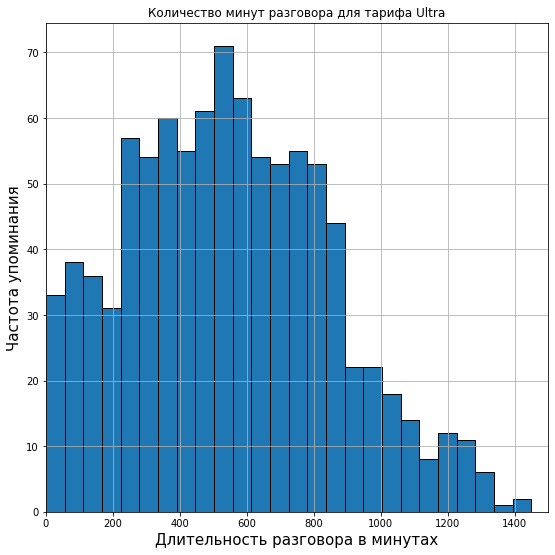

In [ ]:
# график количества минут разговоров
ultra['duration'].plot(kind='hist', ec='black', bins=30, figsize=(9, 9), grid=True)
plt.xlabel('Длительность разговора в минутах', fontsize=15)
plt.ylabel('Частота упоминания', fontsize=15)
plt.xlim([0, 1500])
plt.title("Количество минут разговора для тарифа Ultra")
plt.show()



In [ ]:
# статистические данные по столбцу
ultra['duration'].describe()

count     936.000000
mean      551.708333
std       304.979493
min         1.000000
25%       319.500000
50%       533.000000
75%       760.250000
max      1673.000000
Name: duration, dtype: float64

In [ ]:
# общее количество минут
ultra['duration'].sum()

516399.0

Общая продолжительность звонков на тарифе Ultra - 516399 минут. В среднем клиенты используют 551 минуту голоса в месяц. Учитывая, что включенных и предоплаченнх минут в тарифе Ultra - 3000, а максимальное значение длительности разговора - 1673, можно сделать вывод, что если клиенты и выходят за предоплаченный лимит - это случается очень редко и в виде исключения.

Смотрю как выглядят минуты разговора для тарифа Smart.

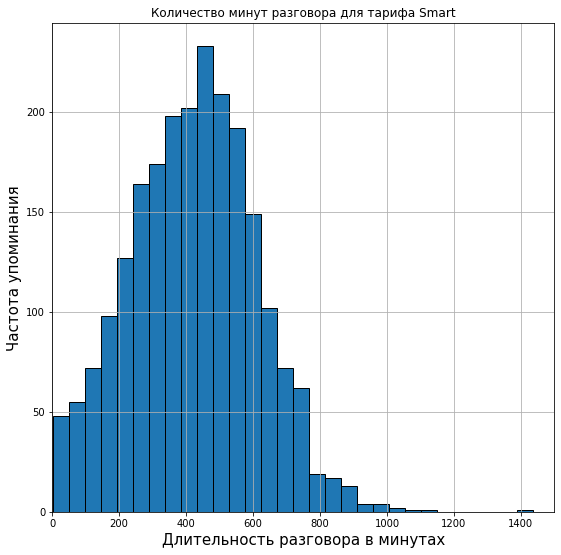

In [ ]:
# график количества минут разговоров
smart['duration'].plot(kind='hist', ec='black', bins=30, figsize=(9, 9), grid=True)
plt.xlabel('Длительность разговора в минутах', fontsize=15)
plt.ylabel('Частота упоминания', fontsize=15)
plt.xlim([0, 1500])
plt.title("Количество минут разговора для тарифа Smart")
plt.show()

In [ ]:
# статистические данные по столбцу
smart['duration'].describe()

count    2219.000000
mean      419.776476
std       188.745325
min         2.000000
25%       285.500000
50%       423.000000
75%       546.000000
max      1435.000000
Name: duration, dtype: float64

In [ ]:
# общее количество минут
smart['duration'].sum()

931484.0

Общая продолжительность звонков на тарифе Smart - 931484 минут. В среднем клиенты используют 419 минут голоса в месяц. Учитывая, что включенных и предоплаченнх минут в тарифе Smart - 500, а максимальное значение 1673, можно сделать вывод, что клиенты тарифа или очень близки к лимиту предоплаченных минут или довольно часто выходят за предоплаченный лимит.

In [ ]:
# проверяем количество клиентов превыисивших предоплаченны лимит
smart.query('duration>500').count()

user_id                  754
month                    754
duration                 754
calls_amount             754
mb_used                  754
messages_amount          754
tariff                   754
city                     754
messages_included        754
mb_per_month_included    754
minutes_included         754
rub_monthly_fee          754
rub_per_gb               754
rub_per_message          754
rub_per_minute           754
extra_expenses           754
income                   754
dtype: int64

Клиентов, превышающих предоплаченный лимит - около 33%  от общего числа клиентов, пользующихся тарифом Smart.

Собираю всю информацию по звонкам в одну таблицу, добавляю стандартное отклонение и дисперсию:

In [ ]:
# таблица с данными о среднем, медианном, стандартном отклонении и дисперсии
clients_total.groupby('tariff')\
     .agg({'duration':['median','mean','var','std']})\
     .style.format("{:.1f}")

## <a name="internet-info-03">Internet (информация об использовании интернета)</a>

Смотрю информацию по объему трафика для тарифа Ultra.

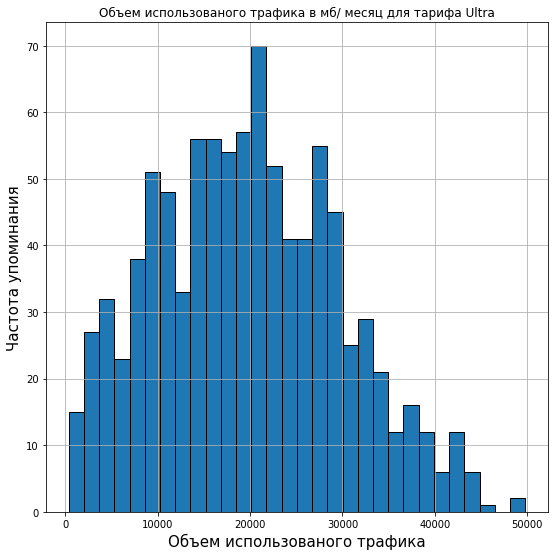

In [ ]:
# график по объему трафика разговоров
ultra['mb_used'].plot(kind='hist', ec='black', bins=30, figsize=(9, 9), grid=True)
plt.xlabel('Объем использованого трафика', fontsize=15)
plt.ylabel('Частота упоминания', fontsize=15)
plt.title("Объем использованого трафика в мб/ месяц для тарифа Ultra")
plt.show()

In [ ]:
# статистические данные по столбцу
ultra['mb_used'].describe()

count      936.000000
mean     19718.717949
std       9972.317787
min        366.000000
25%      11917.000000
50%      19445.000000
75%      26958.500000
max      49789.000000
Name: mb_used, dtype: float64

In [ ]:
# общее количество мб
ultra['mb_used'].sum()

18456720.0

Общее количество трафика на тарифе Ultra -  18440066 мб. В среднем клиенты используют 19700 мб трафика в месяц. Учитывая, что включенных и предоплаченнх мб в тарифе Ultra - 30720, а максимальное значение использования трафика - 49746 мб, можно сделать вывод, что существуют клиенты, которые выходят за пределы предоплаченного количества. 

In [ ]:
# проверяем количество клиентов первысивших лимит
ultra.query('mb_used > 30720').count()

user_id                  128
month                    128
duration                 128
calls_amount             128
mb_used                  128
messages_amount          128
tariff                   128
city                     128
messages_included        128
mb_per_month_included    128
minutes_included         128
rub_monthly_fee          128
rub_per_gb               128
rub_per_message          128
rub_per_minute           128
extra_expenses           128
income                   128
dtype: int64

Всего таких клиентов около 13% от общего числа клиентов, пользующихся тарифом Ultra.

Смотрю информацию по объему трафика для тарифа Smart.

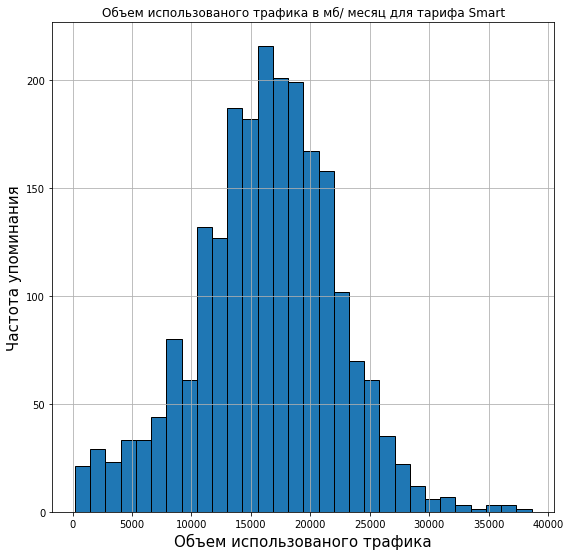

In [ ]:
# график по объему трафика разговоров
smart['mb_used'].plot(kind='hist', ec='black', bins=30, figsize=(9, 9), grid=True)
plt.xlabel('Объем использованого трафика', fontsize=15)
plt.ylabel('Частота упоминания', fontsize=15)
#plt.xlim([0, 1500])
#plt.xlim([0, 1500])
plt.title("Объем использованого трафика в мб/ месяц для тарифа Smart")
plt.show()

In [ ]:
# статистические данные по столбцу
smart['mb_used'].describe()

count     2219.000000
mean     16246.091933
std       5865.865927
min        202.000000
25%      12686.500000
50%      16531.000000
75%      20074.000000
max      38610.000000
Name: mb_used, dtype: float64

In [ ]:
# общее количество мб
smart['mb_used'].sum()

36050078.0

Общее количество трафика на тарифе Smart - 36004953 мб. В среднем клиенты используют 16225 мб трафика в месяц. Учитывая, что включенных и предоплаченнх мб в тарифе Smart - 15360, а максимальное значение использования трафика - 38553 мб, можно сделать вывод, что существуют клиенты, которые выходят за пределы предоплаченного количества. 

In [ ]:
# проверяем количество клиентов первысивших лимит
smart.query('mb_used > 15360').count()

user_id                  1304
month                    1304
duration                 1304
calls_amount             1304
mb_used                  1304
messages_amount          1304
tariff                   1304
city                     1304
messages_included        1304
mb_per_month_included    1304
minutes_included         1304
rub_monthly_fee          1304
rub_per_gb               1304
rub_per_message          1304
rub_per_minute           1304
extra_expenses           1304
income                   1304
dtype: int64

Таких клиентов около 60%  от общего числа клиентов, пользующихся тарифом Smart.

Добавляю всю инофрмацию по трафику в одну таблицу, добавляю стандартное отклонение и дисперсию.

In [ ]:
# таблица с данными о среднем, медианном, стандартном отклонении и дисперсии
clients_total.groupby('tariff')\
     .agg({'mb_used':['median','mean','var','std']})\
     .style.format("{:.1f}")

## <a name="messages-info-03">Messages (информация о sms сообщениях)</a>

Смотрю информацию по объему сообщений для тарифа Ultra.

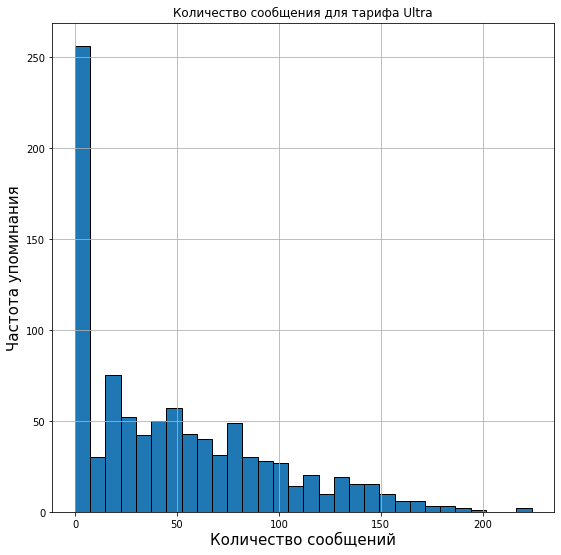

In [ ]:
# график по количеству сообщений
ultra['messages_amount'].plot(kind='hist', ec='black', bins=30, figsize=(9, 9), grid=True)
plt.xlabel('Количество сообщений', fontsize=15)
plt.ylabel('Частота упоминания', fontsize=15)
plt.title("Количество сообщения для тарифа Ultra")
plt.show()

In [ ]:
# статистические данные по столбцу
ultra['messages_amount'].describe()

count    936.000000
mean      49.033120
std       46.778211
min        0.000000
25%        5.000000
50%       39.500000
75%       79.000000
max      224.000000
Name: messages_amount, dtype: float64

В столбце довольно много 0, видимо многие клиенты пользуются только звонками или обмениваются сообщениями в мессенджерах, а значит больше тратят на интернет. Чтобы понять, насолько близко среднее значение к истине, посмотрим еще на медиану, которая более устойчива к выбросам.

In [ ]:
# проверяем медиану
ultra['messages_amount'].median()

39.5

Получается разница примерно в 10 сообщений/ клиент. С моей точки зрения - это довольно большая разница, которая может повлиять на выручку. Поэтому для анализа я буду использовать более устойчивую к выбросам медиану.

In [ ]:
# общее количество сообщений
ultra['messages_amount'].sum()

45895.0

Общее количество сообщений на тарифе Ultra - 45895. В среднем клиенты посылают около 40 сообщений в месяц. Учитывая, что включенных и предоплаченнх сообщений в тарифе Ultra - 1000, а максимальное значение отправленных сообщений - 224, можно сделать вывод, что клиенты редко выходят за предоплаченный лимит сообщений.

Смотрю информацию по объему сообщений для тарифа Smart.

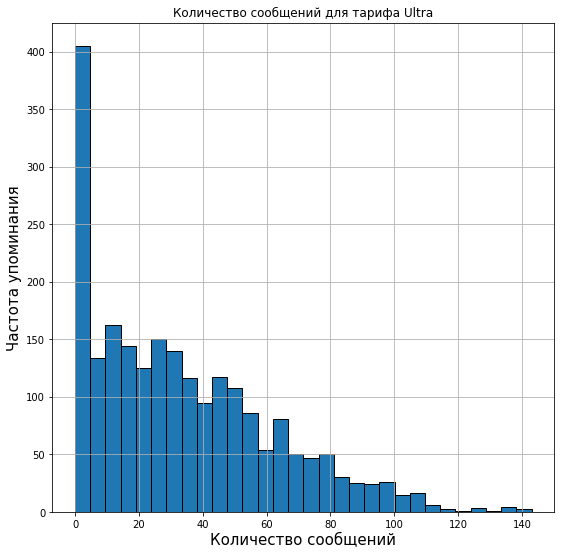

In [ ]:
# график по количеству сообщений
smart['messages_amount'].plot(kind='hist', ec='black', bins=30, figsize=(9, 9), grid=True)
plt.xlabel('Количество сообщений', fontsize=15)
plt.ylabel('Частота упоминания', fontsize=15)
#plt.xlim([0, 1500])
#plt.xlim([0, 1500])
plt.title("Количество сообщений для тарифа Ultra")
plt.show()

In [ ]:
# статистические данные по столбцу
smart['messages_amount'].describe()

count    2219.000000
mean       33.421361
std        28.266229
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages_amount, dtype: float64

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

Также в задании просят рассчитать и дисперсию по каждому параметру. Дополни таблицы по стат. показателям по всем услугам. 

</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Будет здорово, если все стат. показатели ты соберешь в единую таблицу. Так нам будет заметно удобнее сравнивать тарифы между собой. 

</div>


<div class="alert alert-info" role="alert">
Добавила таблицы с дисперсией, стандартным отклонением и пр. данными по двум тарифам в каждый раздел.
Данные по сообщениям ниже, в конце этого раздела.
</div>

Ситуация со средним значением и медианой такая же, как и у тарифа Ultra. Посмотрим, насколько велика разница.

In [ ]:
# проверяем медиану
smart['messages_amount'].median()

28.0

Разница около 3 сообщений, думаю это не очень большая разница и можно использовать как среднее значение, так и медиану.

In [ ]:
# общее количество сообщений
smart['messages_amount'].sum()

74162.0

Общее количество сообщений на тарифе Ultra - 74162. В среднем клиенты посылают около 30 сообщений в месяц. Учитывая, что включенных и предоплаченнх сообщений в тарифе Ultra - 50, а максимальное значение отправленных сообщений - 143, можно сделать вывод, что часть клиентов превышает лимит. 

In [ ]:
# проверяем количество клиентов первысивших лимит
smart.query('messages_amount > 50').count()

user_id                  564
month                    564
duration                 564
calls_amount             564
mb_used                  564
messages_amount          564
tariff                   564
city                     564
messages_included        564
mb_per_month_included    564
minutes_included         564
rub_monthly_fee          564
rub_per_gb               564
rub_per_message          564
rub_per_minute           564
extra_expenses           564
income                   564
dtype: int64

Таких клиентов около 25% от общего числа клиентов, пользующихся тарифом Smart.

Соберем все показатели по сообщениям в одну таблицу, добавим стандартное отклонение и дисперсию.

In [ ]:
# смотрим данные по сообщениям
clients_total.groupby('tariff')\
  .agg({'messages_amount':['median','mean','var','std']})\
  .style.format("{:.1f}")

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Отличная таблица 👍 

</div>

Общий вывод: клиенты тарифа Smart чаще выходят за предоплаченный лимит, если все собрать в одну таблицу и сравнить, получится следующее:

|Тариф/|св. тар. звонки|св. тар. интернет|св. тар. сообщения|
|----|----|----|----|
|Ultra|0% |13% |0% |
|Smart|33% |60% |25%|

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Базовые статистические параметры получены. Приведены все необходимые графики. Графики для одинаковых услуг тарифов лучше привести на одном рисунке. Так удобнее будет сравнивать тарифы. Также можно привести график по выручке компании с разбиением по тарифу. 

</div>


<div class="alert alert-info" role="alert">
Я спросила у кураторов и тьюторов, мне ответили - что на одном графике или на разных - это вкусовщина. Мне удобнее на разных, если я сейчас все начну переделывать на один рисунок - мне это сломает структуру документа. И что значит "рисунок"? График? Два тарифа на одной гистограмме? Ничего не поняла :) Я не ругаюсь, если что, я правда не поняла что надо сделать...
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Две гистограммы по разным тарифам на одних осях. Вот так) Да, соглашусь, это вопрос удобства. Однако основная цель данного раздела - сравнить тарифы между собой. Лучше будет это сделать, когда гистограммы по услугам приведены на одном рисунке. 

</div>

# <a name="hyp-test-01">Проверка гипотез: средняя выручка</a>

Сравним дисперсии выборок, чтобы выбрать значение аргумента `equal_var`.

In [ ]:
# таблица с данными о среднем, медианном, стандартном отклонении и дисперсии
clients_total.groupby('tariff')\
     .agg({'income':['var','std']})\
     .style.format("{:.1f}")

Различие значительное, значит 'equal_var' = False

Задача проверить гипотезу: средняя выручка пользователей тарифов Ultra и Smart различается.
    
* H0: выручка пользователей тарифов Ultra и Smart не различается
* H1: выручка пользователей тарифов Ultra и Smart различается

Так как две выборки независимы, использую Student t-test.

Сначала проверим данные о выручке на выбросы. С моей точки зрения, лучше всего для этого подходит boxplot.

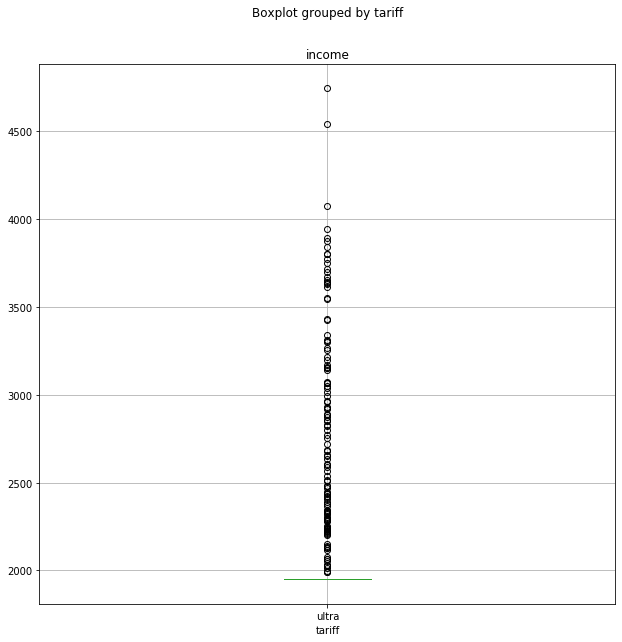

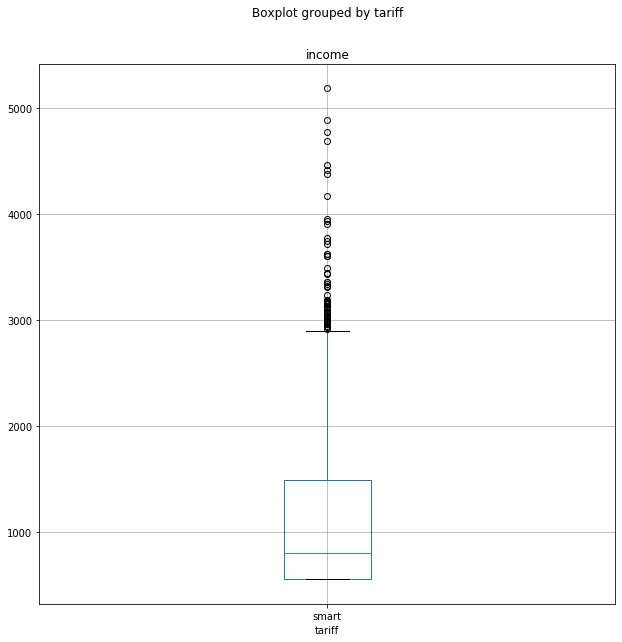

In [ ]:
# строим графики чтобы увидеть есть ли выбросы
ultra.boxplot('income', by='tariff', figsize=(10,10))
smart.boxplot('income', by='tariff', figsize=(10,10))



Графики выглядят странно, но самое главное, видно, что есть выбросы, которые могут исказить данные. 

Для того, чтобы удалить выбросы, использую функцию, которая их определяет на основании квартилей и удаляет лишние данные.

In [ ]:
# функция для поиска выбросов на 90% подсказанная разными людьми на stackoverflow, спасибо им
def remove_outlier(df, column, graf=0, x = 10, y = 10):
    # присваиваю переменным значение квартилей
    low_quartile = df[column].quantile(0.25)
    upper_quartile = df[column].quantile(0.75)
    inter_q_range = upper_quartile - low_quartile
    # использую Interquartile Rule to Find Outliers: https://www.thoughtco.com/what-is-the-interquartile-range-rule-3126244
    find_outlier = (df[column] >= (low_quartile - 1.5 * inter_q_range)) & (df[column] <= (upper_quartile + 1.5 * inter_q_range))
    if graf == 1:
        return df.loc[find_outlier].boxplot([column], figsize=(x,y))
    else:
        return df.loc[find_outlier]
    

In [ ]:
# удаляем выбросы
ultra = remove_outlier(ultra, 'income', 0)
ultra_income = ultra['income']

smart = remove_outlier(smart, 'income', 0)
smart_income = smart['income']

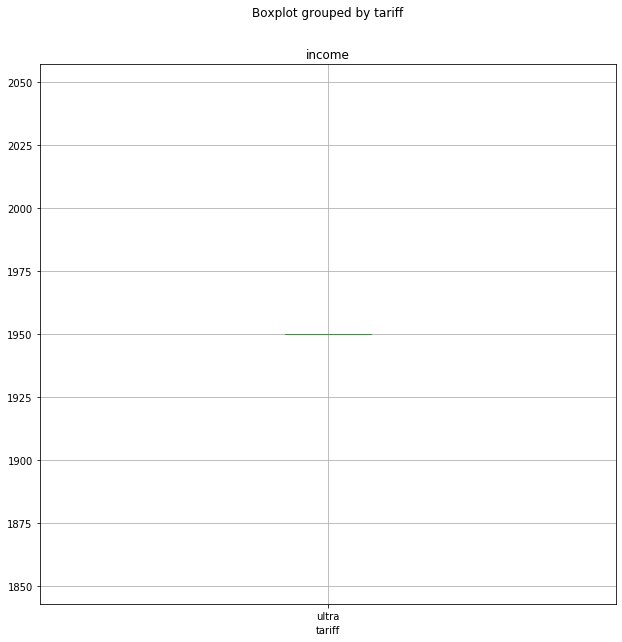

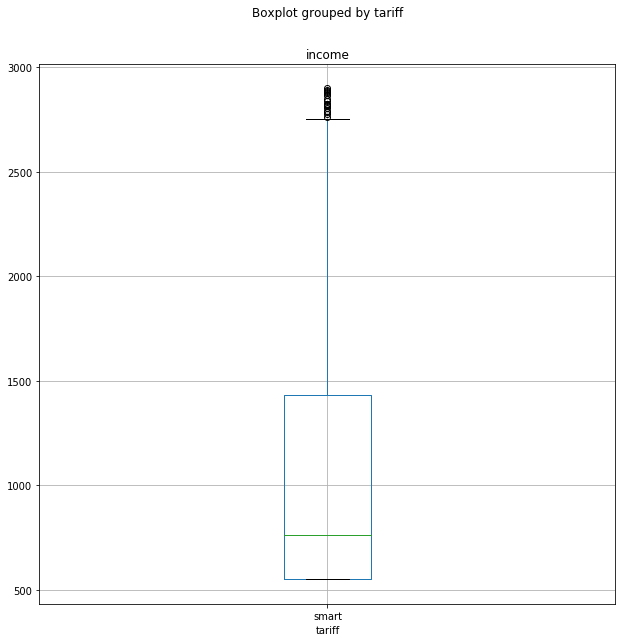

In [ ]:
# проверяем результат
ultra.boxplot('income', by='tariff', figsize=(10,10))
smart.boxplot('income', by='tariff', figsize=(10,10))

Вроде выбросов меньше, можно приступать к проверке гипотезы.

In [ ]:
#проверяем гипотезу
alpha = 0.05
result = st.ttest_ind(ultra_income, smart_income, equal_var=False)

if result.pvalue < alpha:
    print('p-value:', result.pvalue)
    print('Отвергаем H0')
else:
    print('p-value:', result.pvalue)
    print('Отвергаем H1')

p-value: 0.0
Отвергаем H0


Значимость p-value очень мала, отвергаем нулевую гипотезу. 

Вывод: средняя выручка тарифов Smart и Ultra различается.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Гипотезы сформулированы и проверены верно. pvalue стоит вывести полностью для понимания порядка данной величины. 

</div>

Из любопытства посчитаю выручку по тарифам:

In [ ]:
clients_total.pivot_table(index='tariff', values='income', aggfunc=['sum','mean', 'median'])

,sum,mean,median
,income,income,income
tariff,,,
smart,2461788,1109.413249,796
ultra,1931146,2063.190171,1950


# <a name="hyp-test-02">Проверка гипотез: выручка по городам</a>

Задача проверить гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

* H0: выручка компании в Москве и других регионах одинаковая
* H1: выручка в Москве и других региона различается

Так как две выборки независимы, использую Student t-test.

In [ ]:
# проверяем названия городов
clients_total['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Каких-то странных опечаток и прочего нет, поэтому делим на две таблицы - Москва и все остальное.

In [ ]:
# создаем отдельные таблицы
msc = clients_total[clients_total['city'] == 'Москва']
prv = clients_total[clients_total['city'] != 'Москва']

#проверю результат на одной таблице, если с ней все ок, то и со второй тоже все должно быть ок
msc.head(10)

,user_id,month,duration,calls_amount,mb_used,messages_amount,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_expenses,income
8,1001,11,430.0,45.0,18452.0,0.0,smart,Москва,50,15360,500,550,200,3,3,603.90625,1153
9,1001,12,414.0,47.0,14053.0,0.0,smart,Москва,50,15360,500,550,200,3,3,0.00000,550
17,1003,8,380.0,43.0,8571.0,37.0,ultra,Москва,1000,30720,3000,1950,150,1,1,0.00000,1950
18,1003,9,961.0,105.0,12479.0,91.0,ultra,Москва,1000,30720,3000,1950,150,1,1,0.00000,1950
19,1003,10,855.0,97.0,14779.0,83.0,ultra,Москва,1000,30720,3000,1950,150,1,1,0.00000,1950
20,1003,11,824.0,95.0,11368.0,94.0,ultra,Москва,1000,30720,3000,1950,150,1,1,0.00000,1950
21,1003,12,802.0,88.0,10132.0,75.0,ultra,Москва,1000,30720,3000,1950,150,1,1,0.00000,1950
53,1007,4,198.0,21.0,8031.0,11.0,smart,Москва,50,15360,500,550,200,3,3,0.00000,550
54,1007,5,480.0,57.0,17708.0,39.0,smart,Москва,50,15360,500,550,200,3,3,458.59375,1008
55,1007,6,545.0,55.0,13674.0,26.0,smart,Москва,50,15360,500,550,200,3,3,0.00000,550


Смотрим, какое значение должно быть у `equal_var`.

In [ ]:
# таблица с данными  стандартном отклонении и дисперсии для москвы
msc.groupby('tariff')\
     .agg({'income':['var','std']})\
     .style.format("{:.1f}")

In [ ]:
# таблица с данными  стандартном отклонении и дисперсии для москвы
prv.groupby('tariff')\
     .agg({'income':['var','std']})\
     .style.format("{:.1f}")

Различие есть, значит 'equal_var' = False

In [ ]:
# удаляем выбросы 
msc = remove_outlier(msc, 'income', 0)
msc_income = msc['income']

prv = remove_outlier(prv, 'income', 0)
prv_income = prv['income']

In [ ]:
#проверяем гипотезу
alpha = 0.05
result = st.ttest_ind(msc_income, prv_income, equal_var=False)

if result.pvalue < alpha:
    print('p-value:', result.pvalue)
    print('Отвергаем H0')
else:
    print('p-value:', result.pvalue)
    print('Отвергаем H1')

p-value: 0.0897427305729071
Отвергаем H1


Значимость p-value равна 1, отвергаем не нулевую гипотезу.

Вывод: средняя выручка тарифов Smart и Ultra в Москве и регионах не отличается.

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

Проверь еще раз передаваемые в тест выборки. pvalue=1 возможно тогда, когда выборки абсолютно идентичны. 

</div>

<div class="alert alert-info" role="alert">
Блин, я тормоз. Все было неправильно! Поправила сейчас, спасибо за замечаение. :)
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Это опечатки, такое бывает. Главное, что сейчас все хорошо. 

</div>

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

Прежде чем произвести проверку гипотезы через T-критерий Стьюдента произведи проверку дисперсии выборок, чтобы понять с каким параметром использовать метод проверки. Уточни параметр equal_var при проведении обоих тестов. 

</div>

<div class="alert alert-info" role="alert">
Вроде добавила equal_var
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Увидел. Уточнение данного параметра пощволяет нам увеличить точность проводимых тестов. 

</div>

# <a name="conclustion">Общий вывод</a>

На основе проведённого анализа данных, можно сделать следующие выводы:

Общая выручка от тарифов Smart и Ultra различаются:

**тариф Smart** приносит больше общего дохода. Возможно, это связано с тем, что клиенты (которых больше в моей выборке) чаще превышают заложенные в тарифы лимиты и поэтому чаще платят за дополнительные сообщения, минуты разговора и гигабайты интернета. Думаю из-за того, что основная прибыль от этого тарифа основана на переплате, показатель может быть нестабильным - сегодня клиенты переплатили, а завтра уложились в лимиты - прибыль сразу упадёт. 

**тариф Ultra** на первый взгляд приносит меньше дохода, но медиана и средний показатели прибыли у него выше. Так как клиенты этого тарифа реже переплачивают за выход за рамки лимитов, доход от этого тарифа более стабилен. А если привлечь к нему больше клиентов, то и выручка будет больше. Все же в моей выборке клиентов тарифа Ultra было меньше половины.
    
Превышение лимитов  в зависимости от тарифа:
     
|Тариф|св. тар. звонки|св. тар. интернет|св. тар. сообщения|
|----|----|----|----|
|Ultra|0% |13% |0% |
|Smart|33% |60% |25%|

Прибыль в зависимости от тарифа:

|Тариф|общая|средняя|медиана|
|----|----|----|----|
|Ultra|1930532 |2062 |1950 |
|Smart|2455453|1106 |792|
    
    
Выручка в Москве и регионах не отличается. Поэтому тарифы выгодно одинаково развивать как в Москве так и вне Москвы. 


Не совсем понятно, что имелось ввиду под "сообщениями", поэтому я предположила что sms. Клиенты тарифов часто вообще не пользуются этой функцией, видимо общаясь через мессенджеры. Я бы обратила на это внимание, чтобы как-то увеличить прибыль от тарифов. Например, добавила бы в тариф "Ультра" бесплатный трафик для трех-четырех популярных мессенджеров, чтобы привлечь больше клиентов.


Основная рекомендация оператору - обратить внимание на тариф Ultra и подумать как привлечь к нему больше клиентов, обратить внимание на тариф Smart и подумать как стабилизировать от этого тарифа прибыль.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения, правильно. Здорово, что по каждому пункту работы приведен вывод, а также то, что ты привела рекомендации для компании. Это очень важно. 

</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Если тебе нравится тема визуализации, то можешь изучить методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики.

Ты проделала большую работу, молодец! Критических замечаний немного. Однако с ними важно поработать. Также есть достаточное число желтых комментариев. Думаю, исправить их тебе не составит труда. Жду твою работу :)

</div>

<div class="alert alert-info" role="alert">
Нравится, но если я начну ковыряться, я никогда ничего не сдам! XD к тому же там какие-то сложности были с работой seaborn в я.практикум окружении. Так что думаю, оставлю на самостоятельное изучение.
Еще раз спасибо за все комментарии, не знаю кака я так просмотрела супер-важные вещи. Видимо не стоит заниматься статистикой на ночь глядя. :)
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Помарки исправлены, и теперь работа выполнена хорошо. Ты здорово поработала, молодец. Проект получился классным! Спасибо за оставленные комментарии. Успехов в дальнейших проектах :)

</div>
   